In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import requests
import os
from os.path import exists
from shutil import copyfile
import shutil

In [2]:


urls =  [
#     "https://hub.vroid.com/api/character_models?characterization_allowed_user=&corporate_commercial_use=&credit=&is_downloadable=false&max_id=8823678805132214866&personal_commercial_use=",
#     "https://hub.vroid.com/api/character_models/7396549782493746846/optimized_preview"
    "https://hub.vroid.com/api/character_models/6056393358183577091/view"
]
responses = []
for url in urls:
        
    responses.append(requests.get(url,
        headers = {
            "accept": "application/json, text/plain, */*",
            "accept-language": "en-US,en;q=0.9",
            "cache-control": "no-cache",
            "pragma": "no-cache",
            "sec-ch-ua": "\"Chromium\";v=\"92\", \" Not A;Brand\";v=\"99\", \"Google Chrome\";v=\"92\"",
            "sec-ch-ua-mobile": "?0",
            "sec-fetch-dest": "empty",
            "sec-fetch-mode": "cors",
            "sec-fetch-site": "same-origin",
            "x-api-version": "10"
        }
    ))

    
print(responses)

[<Response [404]>]


In [4]:
file_location = "VRoidSpider\data\datmodels.json"

data = None
with open(file_location) as in_file:
    data = json.loads(in_file.read())

model_count = len(data)

downloadable_models = [model for model in data.values() if model["is_downloadable"] == True]
private_models = [model for model in data.values() if model["is_private"] == True]
preview_models = [model for model in data.values() if model["is_other_users_allow_viewer_preview"] == True]

downloadable_models_count = len(downloadable_models)
preview_models_count = len(preview_models)
private_models_count = len(private_models)

print("Total Models: {}".format(model_count))
print("Downloadable Models: {}  ({})".format(downloadable_models_count, downloadable_models_count/model_count))
print("Preview Models: {}  ({})".format(preview_models_count, preview_models_count/model_count))

Total Models: 145364
Downloadable Models: 16043  (0.1103643267934289)
Preview Models: 31510  (0.21676618695137723)


In [25]:
for model in downloadable_models[0:15]:
    print(model['url'])

https://hub.vroid.com/en/characters/63376596105435621/models/1108652048397778918
https://hub.vroid.com/en/characters/5083690511270184294/models/4688409478273037820
https://hub.vroid.com/en/characters/7357839388395503527/models/6056393358183577091
https://hub.vroid.com/en/characters/1518981704591760514/models/1323974719362660260
https://hub.vroid.com/en/characters/8542888097445107233/models/5677064444015133503
https://hub.vroid.com/en/characters/2322396775024560692/models/1659766355416560734
https://hub.vroid.com/en/characters/3144179071432637778/models/7233947125794727195
https://hub.vroid.com/en/characters/8367058592336574070/models/6901327910530218503
https://hub.vroid.com/en/characters/4602481944340422640/models/8380907832382336979
https://hub.vroid.com/en/characters/8857905656485480325/models/8946350928734757961
https://hub.vroid.com/en/characters/8612148283087989072/models/5204013134706272913
https://hub.vroid.com/en/characters/3144179071432637778/models/5311609714161599698
https:

In [87]:

licenses = list(list(data.values())[0]["license"].keys())


print("License Categories:")
for x in licenses:
    print("\t- ", x)
    
disallowed = {}
allowed = {}
    
for cat in licenses:
    disallowed[cat] = len([m["id"] for m in data.values() if m["license"][cat] == "disallow"])
    allowed[cat] = len([m["id"] for m in data.values() if m["license"][cat] == "allow"])

print("Allowed License Categories: ({} Total Models)".format(model_count))
for x in allowed:
    print("\t- {}: {}".format(x, allowed[x]))
    

print("Disallowed License Categories: ({} Total Models)".format(model_count))
for x in disallowed:
    print("\t- {}: {}".format(x, dissallowed[x]))
    
    
    
   

License Categories:
	-  modification
	-  redistribution
	-  credit
	-  characterization_allowed_user
	-  sexual_expression
	-  violent_expression
	-  corporate_commercial_use
	-  personal_commercial_use
Allowed License Categories: (15010 Total Models)
	- modification: 1491
	- redistribution: 1185
	- credit: 0
	- characterization_allowed_user: 0
	- sexual_expression: 4058
	- violent_expression: 4961
	- corporate_commercial_use: 3636
	- personal_commercial_use: 0
Disallowed License Categories: (15010 Total Models)
	- modification: 13519
	- redistribution: 13825
	- credit: 0
	- characterization_allowed_user: 0
	- sexual_expression: 10952
	- violent_expression: 10049
	- corporate_commercial_use: 11374
	- personal_commercial_use: 10717


['modification', 'redistribution', 'credit', 'characterization\nallowed\nuser', 'sexual\nexpression', 'violent\nexpression', 'corporate\ncommercial\nuse', 'personal\ncommercial\nuse']


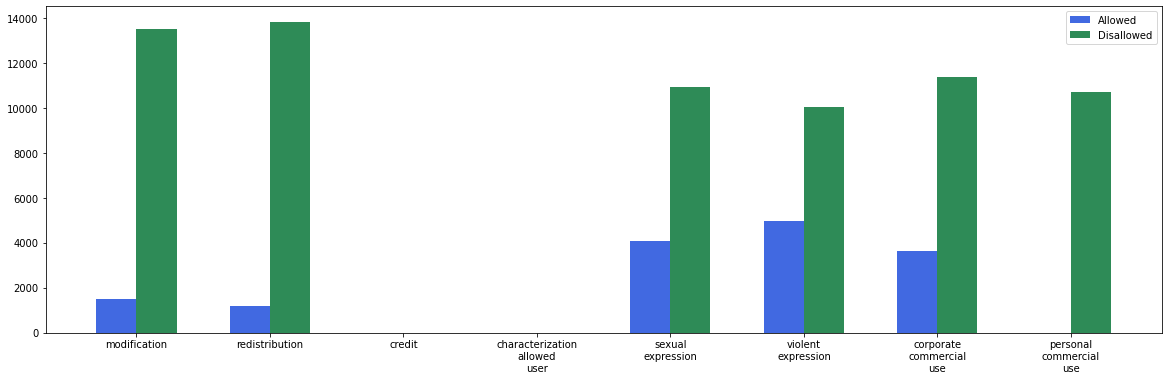

In [84]:
########
# Only Approximate
# I haven't accounted for all types of values in each of the license field.
# Just To Get An Idea For Model Permissions
########
licenses = [l.replace("_", "\n") for l in licenses]
print(licenses)

ind = np.arange(len(disallowed)) 
width = 0.3

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)


rects2 = ax.bar(ind+width, list(disallowed.values()), width, color='seagreen')
rects1 = ax.bar(ind, list(allowed.values()), width, color='royalblue')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(licenses)


ax.legend((rects1[0], rects2[0]), ("Allowed", "Disallowed"))

In [42]:
### REORDER FILES ACCORDING TO STORAGE FORMAT

count = 0


# data = None
# with open(os.path.join('VRoidSpider','test', 'datmodels.json')) as in_file:
#     data = json.loads(in_file.read())


base_path = os.path.join('VRoidSpider','files')
new_base_path = os.path.join('VRoidSpider','files', 'structure')

os.mkdir(new_base_path)




# Structure Data
for model in data.values():
    file_path = os.path.join(base_path, (model['id'] + ".vrm"))
    
    new_folder_path = os.path.join(new_base_path, model['id'])
    new_file_path = os.path.join(new_folder_path, 'model.vrm')
    new_json_path = os.path.join(new_folder_path, 'model.json')
    if exists(file_path):
        # Create Directory
        if not exists(new_folder_path):
            os.mkdir(new_folder_path)
            # Copy File To Directory

            copyfile(file_path, new_file_path)

            # Write JSON for that file specificly
            with open(new_json_path, 'w') as json_file:
                json.dump(model, json_file)

            count += 1
            if (count % 20) == 0:
                print("{} Files Ordered".format(count))
            
        
                            

20 Files Ordered
40 Files Ordered
60 Files Ordered
80 Files Ordered
100 Files Ordered
120 Files Ordered
140 Files Ordered
160 Files Ordered
180 Files Ordered
200 Files Ordered
220 Files Ordered
240 Files Ordered
260 Files Ordered
280 Files Ordered
300 Files Ordered
320 Files Ordered
340 Files Ordered
360 Files Ordered
380 Files Ordered
400 Files Ordered
420 Files Ordered
440 Files Ordered
460 Files Ordered
480 Files Ordered
500 Files Ordered
520 Files Ordered
540 Files Ordered
560 Files Ordered
580 Files Ordered
600 Files Ordered
620 Files Ordered
640 Files Ordered
660 Files Ordered
680 Files Ordered
700 Files Ordered
720 Files Ordered
740 Files Ordered
760 Files Ordered
780 Files Ordered
800 Files Ordered
820 Files Ordered
840 Files Ordered
860 Files Ordered
880 Files Ordered
900 Files Ordered
920 Files Ordered
940 Files Ordered
960 Files Ordered
980 Files Ordered
1000 Files Ordered
1020 Files Ordered
1040 Files Ordered
1060 Files Ordered
1080 Files Ordered
1100 Files Ordered
1120 Fil

In [22]:
### GROUP FILES FOR STORAGE

base_path = os.path.join('VRoidSpider','files', 'structure')

data = None
with open(os.path.join('VRoidSpider','files', 'datmodels.json')) as in_file:
    data = json.loads(in_file.read())


overview_json = {}

print("Folders: ")
for index in range(10):
    ## CREATE 10 Folders
    folder_path = os.path.join(base_path, (str(index)))
    print(folder_path) 
    if exists(folder_path):
       exit(0)
    os.makedirs(folder_path)
    overview_json[index] = {}

print("\n\n\n")



count = 0

for model in data.values():
    group_id = count%10
    
    folder_path = os.path.join(base_path, model['id'])
    new_folder_path = os.path.join(base_path, str(group_id), model['id'])
    
    if exists(folder_path):
        overview_json[group_id][model['id']] = model
#         print(new_folder_path)
        shutil.move(folder_path, new_folder_path)
#         print("Exists!")
        count += 1
       
for group in overview_json:
    grouped_json_path = os.path.join(base_path, str(group), 'models.json')
    print(grouped_json_path)
    with open(grouped_json_path, 'w') as json_file:
            json.dump(overview_json[group], json_file)   
            
overview_json_path = os.path.join(base_path, 'models.json')
with open(overview_json_path, 'w') as json_file:
        json.dump(overview_json, json_file)


Folders: 
VRoidSpider\files\structure\0
VRoidSpider\files\structure\1
VRoidSpider\files\structure\2
VRoidSpider\files\structure\3
VRoidSpider\files\structure\4
VRoidSpider\files\structure\5
VRoidSpider\files\structure\6
VRoidSpider\files\structure\7
VRoidSpider\files\structure\8
VRoidSpider\files\structure\9




VRoidSpider\files\structure\0\models.json
VRoidSpider\files\structure\1\models.json
VRoidSpider\files\structure\2\models.json
VRoidSpider\files\structure\3\models.json
VRoidSpider\files\structure\4\models.json
VRoidSpider\files\structure\5\models.json
VRoidSpider\files\structure\6\models.json
VRoidSpider\files\structure\7\models.json
VRoidSpider\files\structure\8\models.json
VRoidSpider\files\structure\9\models.json


In [27]:
grouped_data = None
with open(os.path.join('VRoidSpider','files', 'structure', 'models.json')) as in_file:
    grouped_data = json.loads(in_file.read())
    
    
for group in grouped_data:
    for model in grouped_data[group].values():
        if model["id"] == "7758856112031886350":
            print(group)
            print(model)

1
{'id': '7758856112031886350', 'name': None, 'is_private': False, 'is_downloadable': True, 'is_other_users_available': True, 'is_other_users_allow_viewer_preview': True, 'is_hearted': False, 'created_at': '2021-02-22T11:05:06.000Z', 'heart_count': 15, 'download_count': 14, 'usage_count': 0, 'view_count': 63, 'published_at': '2021-02-23T12:37:25.000Z', 'portrait_image': {'is_default_image': False, 'original': {'url': 'https://vroid-hub.pximg.net/c/1200x1600_a2_g5/images/portrait_images/720591/952421389826539476.png', 'url2x': None, 'width': 1200, 'height': 1600}, 'w600': {'url': 'https://vroid-hub.pximg.net/c/600x800_a2_g5/images/portrait_images/720591/952421389826539476.png', 'url2x': 'https://vroid-hub.pximg.net/c/1200x1600_a2_g5/images/portrait_images/720591/952421389826539476.png', 'width': 600, 'height': 800}, 'w300': {'url': 'https://vroid-hub.pximg.net/c/300x400_a2_g5/images/portrait_images/720591/952421389826539476.png', 'url2x': 'https://vroid-hub.pximg.net/c/600x800_a2_g5/ima

In [14]:
from os import walk


models = {}

grouped_data = None
with open(os.path.join('Experimental','FullvShowComp','full-models.json')) as in_file:
    grouped_data = json.loads(in_file.read())


for group in grouped_data.values():
    for model in group:
        models[model] = group[model]

showcases = []
for (dirpath, dirnames, filenames) in walk(os.path.join('Experimental','FullvShowComp','showcase')):
    showcases.extend([file.split(".")[0] for file in filenames])
    break

    
    
    
print("Full Download Count:")
print(len(models))

print("Showcase Download Count:")
print(len(showcases))


Full Download Count:
16029
Showcase Download Count:
366


In [18]:
#### Verify Showcases in Full Download Files

models_found = []


for showcase in showcases:
    if showcase in models:
        models_found.append(showcase)
        
        
print("Number OF Showcases Found In Models:")
print(len(models_found))

Number OF Showcases Found In Models:
34


In [23]:
from gltflib import GLTF


json_file = os.path.join('VRoidSpider','files','structure', '0', 'models.json')
base_dir = os.path.join('VRoidSpider','files','structure', '0', )


with open(json_file) as in_file:
    grouped_data = json.loads(in_file.read())


# for model_id in grouped_data:
#     model_path =  os.path.join(base_dir, model_id, 'model.vrm')

#     gltf = GLTF.load(model_path)




test_file = os.path.join('VRoidSpider','files','structure', '0', '6293212183673765', 'model.gltf')


gltf = GLTF.load(test_file)






JSONDecodeError: Expecting value: line 1 column 1 (char 0)